### 목표
- SimpleRNN레이어를 이용해서 순환신경망을 구현해보자
- 글자단위(char)로 구성된 데이터를 순환신경망에 학습시켜보자
- X: h, e, l, l
- y: o

#### 데이터셋 구성
- hello, apple, house, happy, enjoy
- 단어사전 : h, e, l, o, a, p, u, s, y, n, j

In [19]:
import numpy as np

In [3]:
X = np.array([
    [[1,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0]],
    [[0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0]],
    [[0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,1],[0,0,0,1,0,0,0,0,0,0,0]]
])

In [4]:
y = np.array([
    [0,0,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,0,1,0,0]
])

In [5]:
X.shape, y.shape  #((5,4,11), (5,11))  4-> 4번순환, 11-> 11컬럼
# RNN 데이터 shape -> (샘플수, 순환횟수, 특성수)

((5, 4, 11), (5, 11))

In [20]:
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN # 바닐라 RNN 레이어

In [7]:
model = Sequential() # 뼈대 생성
#입력층
model.add(InputLayer(input_shape=(4,11))) # 1개의 샘플이 들어올때 모양을 작성 input_shape=(순환횟수, 특성수)
# 중간(은닉)층
model.add(SimpleRNN(units=32)) # 활성화 함수 기본값은 tanh
# 출력층
model.add(Dense(11, activation="softmax")) # 11개의 단어중 다음에 나올 확률을 맞추는 문제

In [8]:
# 모델요약 정보 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1408      
                                                                 
 dense (Dense)               (None, 11)                363       
                                                                 
Total params: 1771 (6.92 KB)
Trainable params: 1771 (6.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 학습방법설정
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              matrics=["accuracy"])

TypeError: Invalid keyword argument(s) in `compile()`: ({'matrics'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [10]:
model.fit(X,y,epochs=200)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
model.predict(X[0], reshape(1,4,11))

In [24]:


import numpy as np

X = np.array([
    [[1,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0]],
    [[0,0,0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0]],
    [[1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0]],
    [[0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,1],[0,0,0,1,0,0,0,0,0,0,0]]
])

y = np.array([
    [0,0,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,1,0,0]

])

# 데이터 모양 확인
# RNN 데이터 shape -> (samples, time-steps, features)
X.shape, y.shape

### 모델링

from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN # 바닐라 RNN 레이어

model = Sequential() # 뼈대 생성
# 입력층
model.add(InputLayer(input_shape=(4,11))) # 1개의 샘플이 들어올 때 모양을 작성
# 중간(은닉)층
model.add(SimpleRNN(units=32)) # 활성화 함수 기본 값은 tanh
# 출력층
model.add(Dense(11, activation="softmax")) # 11개의 단어중 다음에 나올 확률을 맞추는 문제

# 모델요약 정보 확인
model.summary()

# 학습방법설정
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X,y, epochs=200)

model.predict(X[1].reshape(1,4,11))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1408      
                                                                 
 dense_4 (Dense)             (None, 11)                363       
                                                                 
Total params: 1771 (6.92 KB)
Trainable params: 1771 (6.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.2997 - accuracy: 0.4000
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 2.2471 - accuracy: 0.4000
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 2.1948 - accuracy: 0.4000
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 2.1429 - accuracy: 0.6000
Epoch 5/200
1/1 [===========

array([[2.8897205e-03, 9.8230308e-01, 2.3218116e-03, 1.4383039e-03,
        1.9794321e-03, 1.3820620e-03, 1.7723466e-03, 7.0393737e-04,
        2.2399484e-03, 1.3924635e-03, 1.5770576e-03]], dtype=float32)

### 목표
- 실제 텍스트데이터를 전처리하여 RNN계열 모델에 학습시켜보자
- 네이버영화리뷰데이터 이용하여 긍정/부정을 분류하는 감성분석을 해보자

In [29]:
# 작업디렉토리 변경
%cd "/content/drive/MyDrive/Colab Notebooks/DeepLearning"

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [22]:
import pandas as pd


In [30]:
train_df = pd.read_csv("./data/ratings_train.txt", delimiter='\t')
test_df = pd.read_csv("./data/ratings_test.txt",delimiter="\t")

In [31]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [32]:
X_train = train_df['document']
X_test = test_df['document']
y_train=train_df['label']
y_test = test_df['label']

In [ ]:
X_test.shape, y_test.shape

#### 인공지능기반 텍스트마이닝, 자연어처리 process
- 텍스트마이닝: 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리: 사람이 사용하는 언어의 의미나 문잭을 파악하여 예측하는 분야
- 문제정의>데이터수집>전처리>학습>예측>평가>활용
- 전처리 작업이 다르다
  - 클랜징 (오타/띄어쓰기 교정, 불용어처리, 형태소분석, 어근추출 등)
  - 토큰화, 수치화

##### 클렌징

In [37]:
# 클랜징(형태소분리, 1글자 단어제거, 불용어제거 with 정규표현식)
# 1. 형태소분리(한국어 형태소 분석기 라이브러리 사용)
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 47.9 MB/s eta 0:00:00


In [38]:
from konlpy.tag import Okt
from tqdm import tqdm

In [39]:
okt = Okt() # 형태소 분석기 객체생성

In [40]:
okt.morphs("아버지가 방에 들어가신다.")

['아버지', '가', '방', '에', '들어가신다', '.']

In [41]:
okt.pos("아버지가 방에 들어가신다.")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [42]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [43]:
X_train_morphs = [] # 형태소로 분리된 결과를 담을 리스트
for doc in tqdm(X_train) : # 전체데이터를 반복 tqdm은 반복횟수보여줌
  morphs_result = okt.morphs(doc) # 형태소 추출
  X_train_morphs.append(morphs_result) # 전체리스트에 추가

100%|██████████| 149995/149995 [11:27<00:00, 218.26it/s]


In [44]:
X_test_morphs = [] # 형태소로 분리된 결과를 담을 리스트
for doc in tqdm(X_test) : # 전체데이터를 반복 tqdm은 반복횟수보여줌
  morphs_result = okt.morphs(doc) # 형태소 추출
  X_test_morphs.append(morphs_result) # 전체리스트에 추가

100%|██████████| 49997/49997 [03:38<00:00, 229.22it/s]


In [45]:
# 2. 한글자 토큰 삭제, 불용어 및 불필요한 기호 삭제
stop_words = ["가까스로", "나","다른","마음대로"] # 필요시 데이터로딩하여 추가
# 정규표현식 라이브러리
import re
p = re.compile('[ㅋㅎㄷ~ㅡ.0-9ㅠ!?,]+')  # 정규표현식 패턴 생성[]+안에 있는요소가 한번이상 사용되면 이라는 뜻, 0에서 9까지의 ?

In [46]:
X_train_clean = [] # 클렌징된 리뷰가 담길 리스트
for doc in tqdm(X_train_morphs): # 전체데이터 반복(약 15만개)
  token_list = [] # 중간에 사용할 임시리스트
  for token in doc : # 각 문장마다 토큰을 반복
    if token in stop_words : # 토큰이 불용어 목록에 있다면
      continue # 아래 실행 안하고 다음 인덱스로 넘어감
    if len(token) < 2: # 한글자 토큰 삭제
      continue
    if p.match(token): # 정규표현식 규칙에 매칭되는지 판단
      continue
    token_list.append(token)
  X_train_clean.append(" ".join(token_list))


100%|██████████| 149995/149995 [00:02<00:00, 69276.77it/s]


In [47]:
X_train_clean[:20]

['더빙 진짜 짜증나네요 목소리',
 '포스터 보고 초딩 영화 오버 연기 조차 가볍지 않구나',
 '무재 밓었 다그 래서 보는것을 추천',
 '교도소 이야기 구먼 솔직히 재미 없다 평점 조정',
 '사이 몬페 익살스런 연기 돋보였던 영화 스파이더맨 에서 늙어 보이기만 했던 커스틴 던스트 너무나도 이뻐 보였다',
 '걸음 부터 초등학교 학년 생인 살용 영화 반개 아까',
 '원작 긴장감 제대로 살려내지못 했다',
 '반개 아깝다 나온다 이응경 길용우 생활 인지 정말 해도 그것 보단 낫겟다 납치 감금 반복 반복 드라마 가족 없다 연기 하는 사람',
 '액션 없는데도 재미 있는 안되는 영화',
 '왜케 평점 낮은건데 헐리우드 화려함에만 너무 길들여져 있나',
 '인피니트 이다 진짜 이다',
 '볼때 마다 눈물나서 죽겠다 대의 향수 자극 허진호 감성 절제 멜로 달인 이다',
 '울면 횡단보도 건널 쳐나 이범수 연기 드럽게',
 '담백하고 깔끔해서 좋다 로만 보다 보면 자꾸 잊어버린다 사람 이었다는',
 '취향 존중 다지 진짜 내생 극장 에서 영화 가장 노잼 감동 스토리 어거지 감동 어거지',
 '매번 긴장 되고 재밋음',
 '사람 웃긴게 바스코 이기 락스 라고 까고 바비 이기 아이돌 이라고 깐다 그냥 까고싶어서 안달 처럼 보인다',
 '굿바이 레닌 표절 이해 하는데 갈수록 재미 없어지냐',
 '이건 정말 깨알 캐스팅 질퍽 않은 산뜻한 용구성 버무러진 깨알 일드',
 '약탈 변명 이라 착한 절대 아닌']

In [48]:
X_test_clean = [] # 클렌징된 리뷰가 담길 리스트
for doc in tqdm(X_test_morphs): # 전체데이터 반복(약 15만개)
  token_list = [] # 중간에 사용할 임시리스트
  for token in doc : # 각 문장마다 토큰을 반복
    if token in stop_words : # 토큰이 불용어 목록에 있다면
      continue
    if len(token) < 2: # 한글자 토큰 삭제
      continue
    if p.match(token): # 정규표현식 규칙에 매칭되는지 판단
      continue
    token_list.append(token)
  X_test_clean.append(" ".join(token_list))

100%|██████████| 49997/49997 [00:00<00:00, 66618.60it/s]


In [49]:
# 클렌징된 데이터 저장
import pickle

In [50]:
with open("./data/X_train_morphs.pkl",'wb') as f:
  pickle.dump(X_train_clean, f)

In [51]:
with open("./data/X_test_morphs.pkl",'wb') as f:
  pickle.dump(X_test_clean, f)

In [52]:
# 클렌징된 데이터 로딩
with open("./data/X_train_morphs.pkl", 'rb') as f:
  X_train_clean = pickle.load(f)


In [53]:
with open("./data/X_test_morphs.pkl",'rb') as f:
  X_test_clean = pickle.load(f)

In [54]:
print(len(X_train_clean), y_train.shape)
print(len(X_test_clean), y_test.shape)

149995 (149995,)
49997 (49997,)


##### 토큰화 및 수치화
- 토큰화: 텍스트 데이터를 일정 단위로 쪼개는 작업 -> 글자(char), 띄어쓰기, 형태소단위
- 수치화: 글자를 숫자 타입으로 인코딩하는 행위
  - 빈도기반
    - 라벨인코딩: 전체 말뭉치(corpus)에서 등장하는 빈도를 세어서 숫자를 부여한다
    - 원핫인코딩: (일단 단어사전 생성, 컬럼생성?)문장에서 단어의 등장빈도를 세어 0과 1로 표기하는 방식(종류로는 BOW, Tf-idf)
    - 워드임베딩: 학습을 통해서 압축된 숫자형태로 변환하는 방식
    


In [55]:
# 토큰화 및 수치화(라벨인코딩방식)를 해주는 클래스 로딛
from tensorflow.keras.layers import TextVectorization

약 15만개 문장의 길이가 다르기 때문에 순환횟수를 맞추기 위한 작업을 진행하자

1. 통계 수치를 보고 적정한 길이를 셋팅
  - 길이가 길면 뒤에 등장하는 토큰을 삭제
  - 길이가 짧으면 0을 삽입하여 늘리는 패딩 작업을 실시
2. 컴퓨터 메모리, GPU자원이 괜찮다면 말뭉치내에서 최대길이를 가지는 문장에 맞추는 작업

In [56]:
vetorizer = TextVectorization(
    output_mode = 'int', # 전체 말뭉치에서 특정토큰의 빈도를 세어 랭킹화!?해주는 방식
    output_sequence_length = 30, # 문장의 길이를 맞춰주는 속성
    standardize = "lower_and_strip_punctuation", # 대문자->소문자, 문장부호제거
    max_tokens = 8000 # 빈도가 높은 상위 토큰만 활용
)

In [57]:
# 훈련데이터기반 토큰화 및 단어사전 구축
vetorizer.adapt(X_train_clean)

In [58]:
# 단어사전의 갯수 확인
vetorizer.vocabulary_size()

8000

In [59]:
# 단어토큰 확인
vetorizer.get_vocabulary()

['',
 '[UNK]',
 '영화',
 '너무',
 '정말',
 '진짜',
 '으로',
 '에서',
 '연기',
 '평점',
 '최고',
 '이런',
 '스토리',
 '생각',
 '드라마',
 '이다',
 '감동',
 '사람',
 '하는',
 '보고',
 '하고',
 '배우',
 '감독',
 '그냥',
 '재미',
 '내용',
 '까지',
 '쓰레기',
 '보다',
 '없는',
 '시간',
 '봤는데',
 '작품',
 '사랑',
 '없다',
 '하나',
 '다시',
 '마지막',
 '이건',
 '좋은',
 '정도',
 '입니다',
 '같은',
 '완전',
 '있는',
 '처음',
 '장면',
 '액션',
 '주인공',
 '이렇게',
 '보는',
 '최악',
 '지금',
 '이야기',
 '별로',
 '봐도',
 '느낌',
 '연출',
 '없고',
 '명작',
 '인데',
 '그리고',
 '역시',
 '많이',
 '재밌게',
 '이해',
 '이영화',
 '라고',
 '보면',
 '이나',
 '여자',
 '때문',
 '부터',
 '해서',
 '아깝다',
 '이고',
 '보기',
 '에게',
 '무슨',
 '기억',
 '결말',
 '같다',
 '마음',
 '인생',
 '소재',
 '없이',
 '수준',
 '현실',
 '한다',
 '한번',
 '가장',
 '반전',
 '매력',
 '라는',
 '전개',
 '남자',
 '한국',
 '가슴',
 '되는',
 '하지만',
 '하게',
 '음악',
 '아이',
 '원작',
 '만든',
 '인간',
 '우리',
 '추천',
 '않고',
 '눈물',
 '봤다',
 '합니다',
 '인지',
 '모든',
 '지만',
 '자체',
 '하지',
 '인가',
 '캐릭터',
 '코미디',
 '좋다',
 '솔직히',
 '대박',
 '처럼',
 '했다',
 '뭔가',
 '대한',
 '모두',
 '이상',
 '전혀',
 '연기력',
 '여운',
 '이네',
 '그래도',
 '기대',
 '있다',
 '개봉',
 '근데',
 '공감',
 '일본',

In [60]:
# 수치화
X_train = vetorizer(X_train_clean)
X_train.shape

TensorShape([149995, 30])

In [61]:
X_test = vetorizer(X_test_clean)
X_test.shape

TensorShape([49997, 30])

In [62]:
X_train[0]

<tf.Tensor: shape=(30,), dtype=int64, numpy=
array([ 296,    5, 6182,  459,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])>

##### 모델링

In [ ]:
model = Sequential() # 뼈대생성
model.add(InputLayer(input_shape=(30, 1))) # 순환횟수, 입력되는 데이터 특성의 수 # 하나의 데이터로 표현을해서 1?
model.add(SimpleRNN(units=64)) # 활성화함수는 기본값 tanh
model.add(Dense(units=1, activation='sigmoid')) # 정답데이터 갯수를 보면 갯수를 알기 쉬움. # 이진분류를 위한 출력층

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
h_simple = model.fit(X_train, y_train,
                     validation_split=0.2,  # 8:2의 비율로
                     epochs = 20, batch_size=128
                     )

In [27]:
# 결과 시각화
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,5)) # 가로,세로 길이
plt.plot(h_simple.history['accuracy'], label='train_accuracy')
plt.plot(h_simple.history['val_accuracy'], label='val_accuracy')
plt.legend() # 범례
plt.show()

바닐라 RNN의 경우 긴 시퀀스를 가진 데이터를 효과적으로 학습하기 어렵다
- 순환횟수가 길어질수록 초반에 입력된 단어의 기억데이터가 소실되는 기울기 소실현상이 발생한다
- 문장구성시 초반단어가 후반예측에 영향을 주는 경우는 바닐라 RNN이 학습하기 어렵다
- 장기기억과 단기기억을 관리하는 계산이 추가된 LSTM이 등장했다.

LSTM 모델링

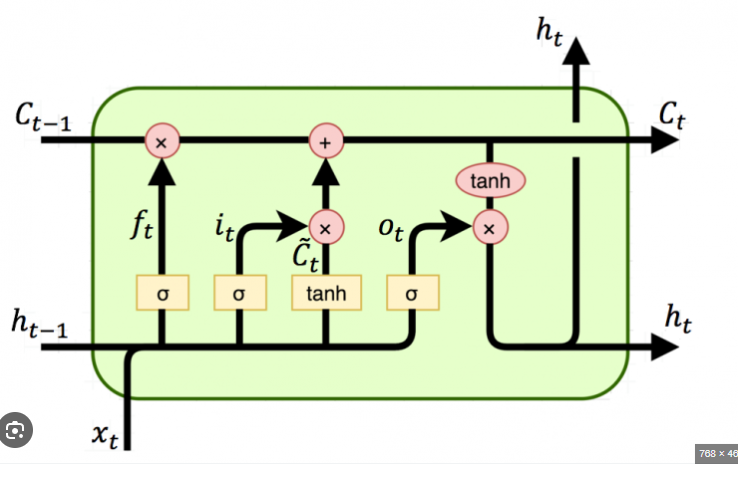

In [12]:
from tensorflow.keras.layers import LSTM, GRU

In [13]:
model_LSTM = Sequential() # 뼈대생성
model_LSTM.add(InputLayer(input_shape=(30, 1))) # 순환횟수, 입력되는 데이터 특성의 수 # 하나의 데이터로 표현을해서 1?
model_LSTM.add(LSTM(units=64)) # 활성화함수는 기본값 tanh
model_LSTM.add(Dense(units=1, activation='sigmoid')) # 정답데이터 갯수를 보면 갯수를 알기 쉬움. # 이진분류를 위한 출력층

In [14]:
model_LSTM.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
h_LSTM = model_LSTM.fit(X_train, y_train,
                     validation_split=0.2,  # 8:2의 비율로
                     epochs = 20, batch_size=128
                     )

NameError: name 'X_train' is not defined

In [16]:
model_GRU = Sequential() # 뼈대생성
model_GRU.add(InputLayer(input_shape=(30, 1))) # 순환횟수, 입력되는 데이터 특성의 수 # 하나의 데이터로 표현을해서 1?
model_GRU.add(GRU(units=64)) # 활성화함수는 기본값 tanh
model_GRU.add(Dense(units=1, activation='sigmoid')) # 정답데이터 갯수를 보면 갯수를 알기 쉬움. # 이진분류를 위한 출력층

In [17]:
model_GRU.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
h_GRU = model_GRU.fit(X_train, y_train,
                     validation_split=0.2,  # 8:2의 비율로
                     epochs = 20, batch_size=128
                     )

In [ ]:
plt.figure(figsize=(10,5)) # 가로,세로 길이
plt.plot(h_LSTM.history['accuracy'], label='LSTM_accuracy')
plt.plot(h_LSTM.history['val_accuracy'], label='LSTM_val_accuracy')
plt.plot(h_GRU.history['accuracy'], label='GRU_train_accuracy')
plt.plot(h_GRU.history['val_accuracy'], label='GRU_val_accuracy')
plt.legend() # 범례
plt.show()

##### 워드임베딩
- 인공지능기반의 텍스트마이닝, 자연어처리 모델링을 할 때 입력되는 데이터의 수치화 방법도 중요하다.
- 현재 라벨인코딩 기반의 수치화는 모델이 단어의 빈도패턴을 학습하게 한다.
- 단어의 본질적인 의미를 파악해서 예측하지는 못하는 구조다
- 단어의 뜻을 압축된 숫자에 이식하는 워드임베딩이 등장했다.

In [18]:
from tensorflow.keras.layers import Embedding # 임베딩레이어

In [63]:
model_with_embedding = Sequential() # 뼈대 생성
model_with_embedding.add(Embedding(8000, 50)) # 사용하는 단어사전의 수, 한 단어를 이식할 숫자벡터의 크기? 만들 컬럼의 수?
model_with_embedding.add(LSTM(128))
model_with_embedding.add(Dense(1,activation='sigmoid'))

In [64]:
model_with_embedding.compile(loss='binary_crossentropy',
                             optimizer='adam',
                             metrics=['accuracy'])

In [65]:
h_embedding = model_with_embedding.fit(X_train, y_train,
                                       validation_split=0.2,
                                       epochs=20, batch_size=128)

Epoch 1/20
938/938 [==============================] - 50s 49ms/step - loss: 0.4368 - accuracy: 0.7843 - val_loss: 0.3828 - val_accuracy: 0.8236
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 0.3621 - accuracy: 0.8326 - val_loss: 0.3940 - val_accuracy: 0.8156
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.3396 - accuracy: 0.8399 - val_loss: 0.3917 - val_accuracy: 0.8266
Epoch 4/20
938/938 [==============================] - 10s 10ms/step - loss: 0.3179 - accuracy: 0.8493 - val_loss: 0.3858 - val_accuracy: 0.8269
Epoch 5/20
938/938 [==============================] - 7s 8ms/step - loss: 0.2978 - accuracy: 0.8580 - val_loss: 0.3936 - val_accuracy: 0.8163
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2797 - accuracy: 0.8661 - val_loss: 0.4267 - val_accuracy: 0.8226
Epoch 7/20
938/938 [==============================] - 10s 10ms/step - loss: 0.2637 - accuracy: 0.8742 - val_loss: 0.4194 - val_accuracy: 0.8

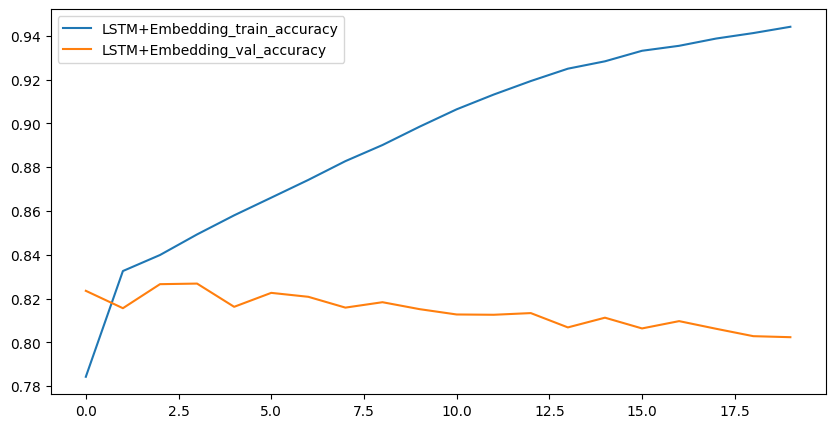

In [66]:
plt.figure(figsize=(10,5)) # 가로,세로 길이
plt.plot(h_embedding.history['accuracy'], label='LSTM+Embedding_train_accuracy')
plt.plot(h_embedding.history['val_accuracy'], label='LSTM+Embedding_val_accuracy')
plt.legend() # 범례
plt.show()

##### 임베딩레이어
- 임베딩레이어에 들어있는 숫자 묶음을 임베딩 벡터라고 부른다
- 잘 만들어진 임베딩벡터는 전이학습에 활용할 수 있다.
- 사전학습된 임베딩벡터를 활용해 적은 데이터를 이용하더라도 고성능을 내는 모델을 구성할 수 있다.